# Kaggle - Titanic

## Import Functions

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from titanic import *

## Import Data

**Import: `train` data**

In [2]:
filename = 'data/train.csv'
df_train = import_data(filename)
df_train.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


**Import: `test` data**

In [3]:
filename = 'data/test.csv'
df_test = import_data(filename)
df_test.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


**Concatedate `train` and `test` dataframes**

In [4]:
df = concatenate_dataframes(df_train, df_test)

## Pre Processing

### Feature Engineering

In [5]:
df = create_features(df)

In [6]:
df.head(3)

,Survived,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,Title,Survival_by_title,Age
0,0.0,3,"Braund, Mr. Owen Harris",male,1,0,NaN,S,Mr,low,22.0
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,C85,C,Mrs,high,38.0
2,1.0,3,"Heikkinen, Miss. Laina",female,0,0,NaN,S,Miss,high,26.0


In [7]:
df.tail(3)

,Survived,Pclass,Name,Sex,SibSp,Parch,Cabin,Embarked,Title,Survival_by_title,Age
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,0,0,NaN,S,Mr,low,38.500000
1307,NaN,3,"Ware, Mr. Frederick",male,0,0,NaN,S,Mr,low,25.962264
1308,NaN,3,"Peter, Master. Michael J",male,1,1,NaN,C,Master,high,25.962264


### Select Features

In [8]:
features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Survival_by_title']
df = select_features(df, features)

In [9]:
df.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Survival_by_title
0,0.0,3,male,1,0,low
1,1.0,1,female,1,0,high
2,1.0,3,female,0,0,high


### Transform categorical variables in dummies

In [10]:
categorical_variables = ['Pclass', 'Sex', 'Survival_by_title']
df = convert_categorical(df, categorical_variables)

In [11]:
df.head(3)

,Survived,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Survival_by_title_high,Survival_by_title_low
0,0.0,1,0,0,0,1,0,1,0,1
1,1.0,1,0,1,0,0,1,0,1,0
2,1.0,0,0,0,0,1,1,0,1,0


### Extract `X` and `y` from `train` and `test`

In [12]:
flag = df['Survived'].isnull()
X_train, y_train = extract_X_y(df[~flag])
X_test, y_test = extract_X_y(df[flag])

## Model: Hyperparameter Optimization

### Logistic Regression

In [13]:
model_type = 'LogisticRegression'
gridsearch_lr = train_model(model_type, X_train, y_train)
df = predict(gridsearch_lr, X_test, df, column='LR')
search = gridsearch_output(gridsearch_lr)
search

,params,mean_test_score,std_test_score
0,{'C': 5},0.828277,0.037974
1,{'C': 6},0.828277,0.037974
2,{'C': 7},0.828277,0.037974
3,{'C': 8},0.828277,0.037974
4,{'C': 9},0.828277,0.037974
5,{'C': 10},0.828277,0.037974
6,{'C': 11},0.828277,0.037974
7,{'C': 12},0.828277,0.037974
8,{'C': 13},0.828277,0.037974
9,{'C': 14},0.828277,0.037974


### Decision Tree Classifier

In [14]:
model_type = 'DecisionTreeClassifier'
gridsearch_dtc = train_model(model_type, X_train, y_train)
df = predict(gridsearch_dtc, X_test, df, column='DTC')
search = gridsearch_output(gridsearch_dtc)
search

,params,mean_test_score,std_test_score
0,{'max_depth': 5},0.827166,0.031823
1,{'max_depth': 3},0.824894,0.033505
2,{'max_depth': 7},0.820474,0.033758
3,{'max_depth': 4},0.818227,0.035523
4,{'max_depth': 8},0.813745,0.033406
5,{'max_depth': 6},0.813745,0.036993
6,{'max_depth': 9},0.809251,0.032600
7,{'max_depth': 10},0.809251,0.032600


### K Neighbors Classifier

In [15]:
model_type = 'KNeighborsClassifier'
gridsearch_knn = train_model(model_type, X_train, y_train)
df = predict(gridsearch_knn, X_test, df, column='KNN')
search = gridsearch_output(gridsearch_knn)
search

,params,mean_test_score,std_test_score
0,{'n_neighbors': 20},0.826042,0.034513
1,{'n_neighbors': 25},0.824906,0.033825
2,{'n_neighbors': 27},0.824906,0.034196
3,{'n_neighbors': 22},0.823783,0.033399
4,{'n_neighbors': 17},0.822709,0.040867
5,{'n_neighbors': 30},0.821536,0.034306
6,{'n_neighbors': 15},0.817104,0.033426


### SVC

In [16]:
model_type = 'SVC'
gridsearch_svc = train_model(model_type, X_train, y_train)
df = predict(gridsearch_svc, X_test, df, column='SVC')
search = gridsearch_output(gridsearch_svc)
search

,params,mean_test_score,std_test_score
0,{'C': 0.09},0.830524,0.029075
1,{'C': 0.07},0.829401,0.028798
2,{'C': 0.08},0.829401,0.028798
3,{'C': 0.1},0.829401,0.028798
4,{'C': 0.06},0.828277,0.028028
5,{'C': 0.05},0.826030,0.026277


## Model Selection

### Create models with optimal hyperparameter

In [17]:
lr = LogisticRegression(C=gridsearch_lr.best_params_['C'])
dtc = DecisionTreeClassifier(max_depth=gridsearch_dtc.best_params_['max_depth'])
knn = KNeighborsClassifier(n_neighbors=gridsearch_knn.best_params_['n_neighbors'])
svc = SVC(C=gridsearch_svc.best_params_['C'])

### Check optimal model by Stratified KFold

In [18]:
n_splits = 10
optimal_kfold = pd.DataFrame(columns=['model', 'accuracy'])
accuracy_df = pd.DataFrame(index=['Logistic', 'DTC', 'KNN', 'SVC'], columns=['accuracy'])

In [19]:
kf = StratifiedKFold(n_splits=n_splits)
i = 0
for train_index, test_index in kf.split(X_train, y_train):
    
    XX_train, XX_test = X_train.iloc[train_index], X_train.iloc[test_index]
    yy_train, yy_test = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Logistic
    accuracy_df['accuracy']['Logistic'] = fit_predict_score(lr, XX_train, XX_test, yy_train, yy_test)
    
    # DTC
    accuracy_df['accuracy']['DTC'] = fit_predict_score(dtc, XX_train, XX_test, yy_train, yy_test)
    
    # KNN
    accuracy_df['accuracy']['KNN'] = fit_predict_score(knn, XX_train, XX_test, yy_train, yy_test)
    
    # SVC
    accuracy_df['accuracy']['SVC'] = fit_predict_score(svc, XX_train, XX_test, yy_train, yy_test)
    
    best_score = accuracy_df['accuracy'].max()
    best_model = accuracy_df[accuracy_df['accuracy'] == best_score].index[0]
    
    optimal_kfold.loc[i] = [best_model]+[best_score]
    i+=1

### Check Results

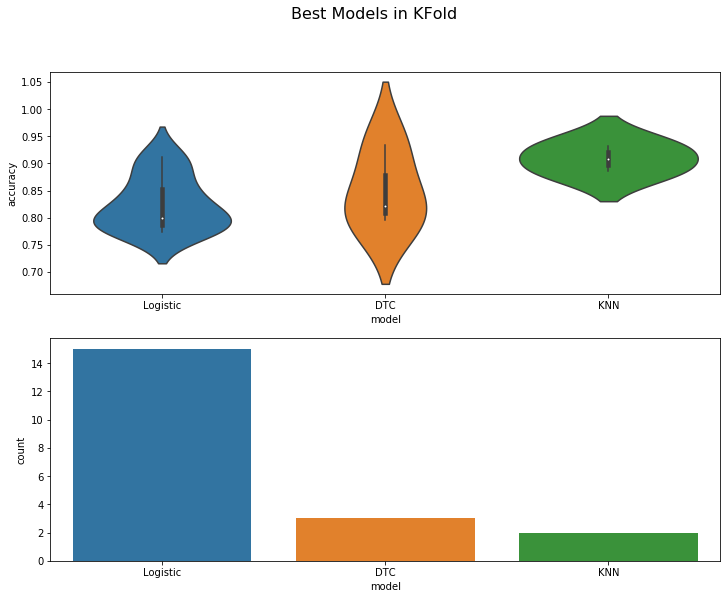

In [20]:
f, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 9))
sns.violinplot(x='model', y='accuracy', data=optimal_kfold, ax=ax1)
sns.countplot(optimal_kfold['model'])
plt.suptitle('Best Models in KFold', fontsize=16)
plt.show()

## Predict Evaluation Set

### Run chosen model with optimal hyperparameter and full training set

In [21]:
model = lr
model.fit(X_train, y_train)
indexes = X_test.index
df_test['Survived'] = np.nan
df_test['Survived'] = model.predict(X_test)

### Export to csv

In [22]:
filename = 'output/lr_opt2.csv'
df_test['Survived'] = df_test['Survived'].astype('int')
df_test[['Survived']].to_csv(filename)